In [64]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening
from broadpy.utils import load_example_data

# load PHOENIX model (R~1e6)
wave, flux = load_example_data()
IB = InstrumentalBroadening(wave, flux)

In [84]:
# Instrumental Broadening at a given resolution (or FWHM)
R = 70_000
fwhm = 2.998e5/R # full-width at half-maximum (FWHM) for Gaussian [km/s]
gamma = 1.0 # half-width at half-maximum (HWHM) for Lorentzian [km/s]
flux_voigt = IB(fwhm=fwhm, gamma=gamma)
flux_gauss = IB(fwhm=fwhm)
flux_lorentz = IB(gamma=gamma)

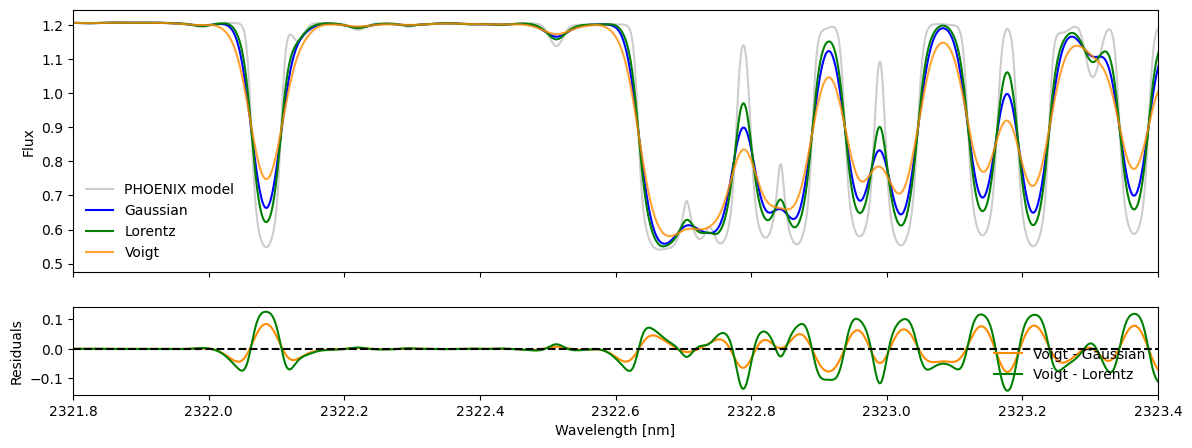

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(wave, flux, label='PHOENIX model', alpha=0.2, color='k')
ax[0].plot(wave, flux_gauss, label='Gaussian', color='b', ls='-')
ax[0].plot(wave, flux_lorentz, label='Lorentz', color='g', ls='-')
ax[0].plot(wave, flux_voigt, label='Voigt', color='darkorange', alpha=0.8)


residuals = flux_voigt - flux_gauss
ax[1].plot(wave, residuals, color='darkorange', label='Voigt - Gaussian')
ax[1].plot(wave, flux_voigt - flux_lorentz, color='g', label='Voigt - Lorentz')
ax[1].axhline(0, color='k', ls='--')

[axi.legend(loc='lower right', frameon=False) for axi in ax]
ax[1].set_xlim(2321.7, 2323.4)
ax[1].set(xlabel='Wavelength [nm]', ylabel='Residuals')

ax[0].set(ylabel='Flux')

plt.show()
